<div style="font-size:200%; font-weight:bold; font-variant:small-caps;"></style>

<div style="font-size:200%; font-variant:small-caps; font-weight:bold;">Experiment: Creating a Dictionary of Word Usages based on the the Topic-Term Table (PHI $\Phi$)</div>

In [1]:
import pandas as pd
from lib import tapi

In [2]:
db = tapi.Edition('winereviews').get_tables()

LABELS
VOCAB
BOW
TOPICS
DTM
THETA
PHI
TOPICS_NMF
THETA_NMF
PHI_NMF


In [3]:
n_top_topics = 5

In [4]:
db.PHI.T.stack()\
    .to_frame('weight')\
    .groupby('term_str')\
    .apply(lambda x: x.weight.quantile(.9)).sort_values(ascending=False)

term_str
flavors                     497.013241
wine                        465.791922
palate                      359.981343
fruit                       316.287054
tannins                     303.637529
                               ...    
cherry crushed raspberry      0.050000
alongside firm fine           0.050000
fragrant blue flower          0.050000
fragrant blue                 0.050000
crushed raspberry             0.050000
Length: 4000, dtype: float64

In [5]:
V = db.PHI.T.stack()\
    .to_frame('weight')\
    .groupby('term_str')\
    .apply(lambda x: x.weight.sort_values(ascending=False)\
               .head(n_top_topics)\
               .reset_index()\
               .drop('term_str',1)\
               .topic_id).unstack().to_frame('topic_id')\
                .rename_axis(index={'topic_id':'topic_rank'})\
                .reset_index().set_index(['term_str','topic_rank']).sort_index()

In [7]:
V

topic_id
term_str      topic_rank          
000           0                 10
              1                 17
              2                  3
              3                 19
              4                  4
...                            ...
zippy acidity 0                 10
              1                 11
              2                  8
              3                  2
              4                  9

[20000 rows x 1 columns]

In [8]:
V['topic_weight'] = db.PHI.T.stack()\
    .to_frame('weight')\
    .groupby('term_str')\
    .apply(lambda x: x.weight.sort_values(ascending=False)\
               .head(n_top_topics)\
               .reset_index()\
               .drop('term_str',1)\
               .weight).unstack().to_frame('topic_rank')\
                    .rename(columns={'topic_rank':'topic_weight'})\
                    .rename_axis(index={'weight':'topic_rank'})\
                    .reset_index().set_index(['term_str','topic_rank']).sort_index()

In [9]:
V.head(10)

topic_id  topic_weight
term_str  topic_rank                        
000       0                 10     17.609169
          1                 17      1.050000
          2                  3      1.050000
          3                 19      0.359698
          4                  4      0.131313
000 cases 0                 10     13.651660
          1                 19      0.448229
          2                 16      0.050111
          3                 18      0.050000
          4                 15      0.050000

In [35]:
db.VOCAB['topic_max_weight'] = db.PHI.max()

In [11]:
db.VOCAB['topic_max_id'] = db.PHI.idxmax()

In [13]:
db.VOCAB

,ngram_len,n,tfidf_mean,topic_max_wegiht,topic_max_id
term_str,,,,,
000,1,20,0.000502,17.609169,10
000 cases,2,14,0.000366,13.651660,10
10,1,141,0.002449,39.210270,13
10 merlot,2,14,0.000324,10.148418,12
10 years,2,30,0.000687,9.282589,13
...,...,...,...,...,...
zin,1,59,0.001335,30.916688,18
zinfandel,1,89,0.001958,33.156300,13
zingy,1,19,0.000526,8.358213,4


<AxesSubplot:xlabel='tfidf_mean', ylabel='topic_max_weight'>

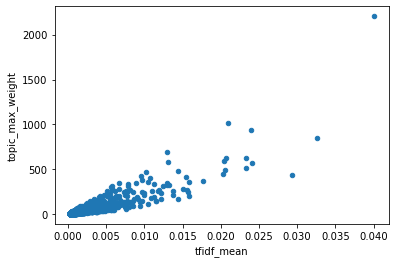

In [36]:
db.VOCAB.plot.scatter('tfidf_mean', 'topic_max_weight')

<AxesSubplot:xlabel='n', ylabel='topic_max_weight'>

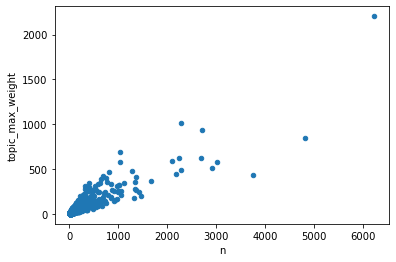

In [37]:
db.VOCAB.plot.scatter('n', 'topic_max_weight')

<AxesSubplot:xlabel='ngram_len', ylabel='topic_max_weight'>

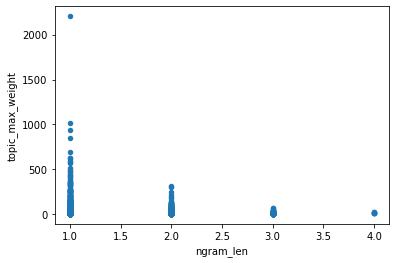

In [38]:
db.VOCAB.plot.scatter('ngram_len', 'topic_max_weight')

In [23]:
PHIp = db.PHI / db.PHI.sum()

In [32]:
db.VOCAB['topic_entropy'] = (PHIp * np.log2(1/PHIp)).sum()

In [33]:
db.VOCAB

,ngram_len,n,tfidf_mean,topic_max_wegiht,topic_max_id,topic_entropy
term_str,,,,,,
000,1,20,0.000502,17.609169,10,1.118670
000 cases,2,14,0.000366,13.651660,10,0.768790
10,1,141,0.002449,39.210270,13,3.054902
10 merlot,2,14,0.000324,10.148418,12,1.469980
10 years,2,30,0.000687,9.282589,13,2.339546
...,...,...,...,...,...,...
zin,1,59,0.001335,30.916688,18,2.092087
zinfandel,1,89,0.001958,33.156300,13,2.765420
zingy,1,19,0.000526,8.358213,4,2.188088


In [49]:
import plotly_express as px

In [53]:
px.scatter(db.VOCAB, 'topic_entropy', 'tfidf_mean', text=db.VOCAB.index, height=800)

In [40]:
db.VOCAB.topic_entropy.idxmax()

'fruit'

In [42]:
db.VOCAB.sort_values('topic_entropy', ascending=False).head(20)

,ngram_len,n,tfidf_mean,topic_max_wegiht,topic_max_id,topic_entropy,topic_max_weight
term_str,,,,,,,
fruit,1,3765,0.029352,434.420937,3,4.102468,434.420937
shows,1,914,0.011531,146.776156,0,4.037018,146.776156
hints,1,366,0.005931,44.105617,3,4.001415,44.105617
forward,1,197,0.003671,27.491621,16,3.923764,27.491621
grapes,1,227,0.003927,38.990158,3,3.920533,38.990158
offering,1,209,0.003733,29.977633,13,3.897793,29.977633
spice,1,1465,0.015807,205.417357,6,3.891217,205.417357
power,1,198,0.003546,31.804690,13,3.879995,31.804690
mouth,1,537,0.007949,82.686710,4,3.859157,82.686710


In [43]:
db.VOCAB.sort_values('topic_entropy', ascending=True).head(20)

,ngram_len,n,tfidf_mean,topic_max_wegiht,topic_max_id,topic_entropy,topic_max_weight
term_str,,,,,,,
wine ready,2,77,0.001691,77.048211,3,0.146898,77.048211
wine ready drink,3,66,0.001502,66.046668,3,0.168116,66.046668
blue flower,2,66,0.001156,66.011625,6,0.173284,66.011625
skinned,1,63,0.001094,63.049998,6,0.174472,63.049998
dry core,2,54,0.001265,54.047562,3,0.199659,54.047562
wood aging,2,128,0.002529,126.245855,3,0.203409,126.245855
medium bodied wine,3,47,0.001094,47.044044,11,0.225562,47.044044
aftertaste drink,2,44,0.001092,44.043133,3,0.238791,44.043133
tilled,1,38,0.000736,38.050000,6,0.268736,38.050000


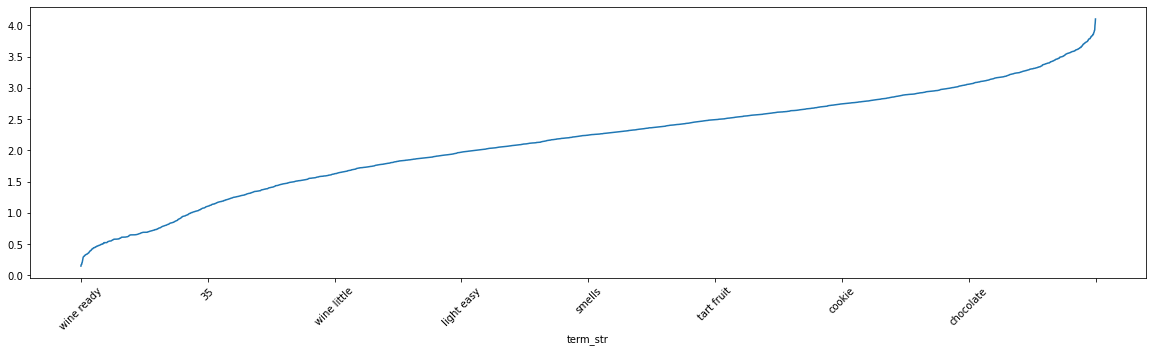

In [55]:
db.VOCAB.sort_values('topic_entropy', ascending=True).topic_entropy.plot(rot=45, figsize=(20,5));

In [61]:
# db.VOCAB.plot.scatter('n', 'topic_entropy', logx=True, logy=True)

In [57]:
db.VOCAB

,ngram_len,n,tfidf_mean,topic_max_wegiht,topic_max_id,topic_entropy,topic_max_weight
term_str,,,,,,,
000,1,20,0.000502,17.609169,10,1.118670,17.609169
000 cases,2,14,0.000366,13.651660,10,0.768790,13.651660
10,1,141,0.002449,39.210270,13,3.054902,39.210270
10 merlot,2,14,0.000324,10.148418,12,1.469980,10.148418
10 years,2,30,0.000687,9.282589,13,2.339546,9.282589
...,...,...,...,...,...,...,...
zin,1,59,0.001335,30.916688,18,2.092087,30.916688
zinfandel,1,89,0.001958,33.156300,13,2.765420,33.156300
zingy,1,19,0.000526,8.358213,4,2.188088,8.358213


In [64]:
db.PHI.T.apply()

topic_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
term_str,,,,,,,,,,,,,,,,,,,,
000,0.099775,0.050000,0.050000,1.050000,0.131313,0.050000,0.050000,0.050000,0.050000,0.050000,17.609169,0.050000,0.050000,0.050000,0.050000,0.050000,0.050046,1.050000,0.050000,0.359698
000 cases,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,13.651660,0.050000,0.050000,0.050000,0.050000,0.050000,0.050111,0.050000,0.050000,0.448229
10,3.022868,6.050108,0.086162,12.000268,2.211543,0.101013,22.331032,1.045292,10.185422,1.160380,0.050408,1.294196,30.289550,39.210270,2.655304,0.616758,0.050000,0.050000,5.396295,4.193130
10 merlot,0.050000,0.050000,0.050000,0.074871,0.050000,0.050000,3.677772,0.050000,0.050000,0.050000,0.060776,0.050010,10.148418,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.288153
10 years,0.050000,0.050028,0.246771,4.402638,0.050000,0.050000,0.239903,0.050000,9.034005,0.050000,0.050000,0.050000,0.050000,9.282589,0.714246,0.050000,0.050000,0.050000,6.429821,0.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zin,0.116645,0.050000,7.123497,0.050000,0.050000,0.050000,0.050000,2.785839,0.060344,0.054433,13.373624,0.812096,0.050000,2.531205,0.050000,0.050000,0.050000,0.050000,30.916688,1.725630
zinfandel,2.287602,2.947806,7.194691,0.050000,0.050000,0.050281,0.050077,0.199611,5.344790,0.114119,2.819018,1.565075,0.050000,33.156300,15.578222,0.050000,3.179541,0.050000,14.845903,0.416965
zingy,0.050000,0.050000,0.050000,0.050000,8.358213,6.608463,0.050000,0.050000,1.050000,0.050000,0.050032,0.050000,0.050000,0.050000,0.050000,1.545865,0.050000,0.050000,0.051403,1.686023
